In [58]:
import numpy as np; import pandas as pd
import json
import os
import matplotlib.pyplot as plt; import seaborn as sns
file_path = 'cache'
MAX_SAMPLES = 512
types = ['kl', 'af', 'wm', 'merged']
type_labels = {'af': 'Auxiliary 2',
               'wm': 'Auxiliary 1',
               'kl': 'KL barycenter',
               'merged': 'Ckpt merging'}

def load_json_from_drive(filename):
    filepath = os.path.join(file_path, filename)
    with open(filepath, 'r') as f:
        return json.load(f)

try:
    # Filenames: [gender_clips_512.json, GenderCLIP_512.json]
    gender_clips = load_json_from_drive(f'gender_clips_{MAX_SAMPLES}.json')
    # Filenames: [ethnic_clips_512.json, EthnicCLIP_512.json]
    ethnic_clips = load_json_from_drive(f'ethnic_clips_{MAX_SAMPLES}.json')
except FileNotFoundError:
    print("One or more of the JSON files were not found. Please ensure the filenames and path are correct.")
except json.JSONDecodeError:
  print("Error decoding the JSON files. Please ensure they are valid JSON.")

# Hack to remove the first and last keys for ablation study visualization
if '0' in ethnic_clips.keys():
  ethnic_clips.pop('50'); ethnic_clips.pop('80')
if '0' in gender_clips.keys():
  gender_clips.pop('50'); gender_clips.pop('80')


In [34]:
import matplotlib

# Use Type 1 fonts
matplotlib.rcParams['pdf.fonttype'] = 42  # Use TrueType fonts (Type 1 alternative)
matplotlib.rcParams['ps.fonttype'] = 42  # Avoid Type 3 fonts in PS/EPS files
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['DejaVu Serif']  # Preinstalled in Colab
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['text.usetex'] = False # TODO: need to figure out how to install latex

## Scatter plot

In [ ]:
data = []

for typ, coords in ethnic_clips.items(): # [Logits_scores, Ethnic_logits_scores]
    for x,y in coords:
        data.append({'Model': type_labels[typ], 'x': x, 'y': y})
df = pd.DataFrame(data)

custom_palette = {
    "Auxiliary 1": "red",
    "Auxiliary 2": "orange",
    "KL barycenter": "blue",
    "Ckpt merging": "green"
}

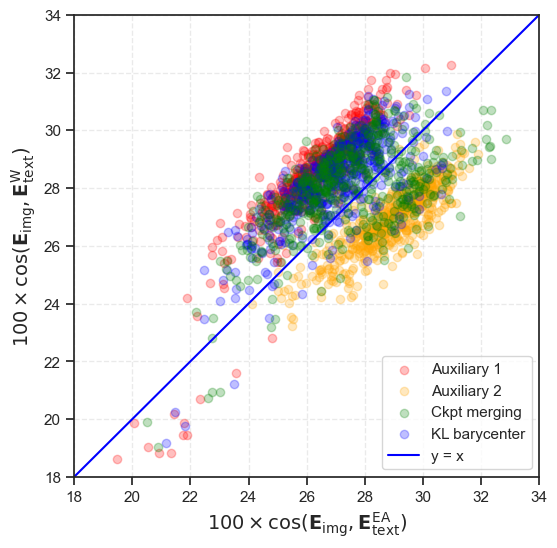

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fontsize = 14
x_min, y_min = 18, 18
x_max, y_max = 34, 34
# Gender scatter plot
for typ, points in ethnic_clips.items():
    # Extract x and y coordinates directly from the points list
    points_array = np.array(points)
    x_coords = points_array[:, 0]
    y_coords = points_array[:, 1]
    ax.scatter(x_coords, y_coords, color=custom_palette[type_labels[typ]], 
               label=type_labels[typ], alpha=0.25)

# Plot diagonal line
x = np.linspace(min(x_min, y_min), max(x_max, y_max))
y = x
ax.plot(x, y, label='y = x', color='blue')

# Set labels and title
ax.set_xlabel(r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{EA}})$', fontsize = fontsize)
ax.set_ylabel(r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{W}})$', fontsize = fontsize)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

handles, labels = ax.get_legend_handles_labels()
desired_order = ["Auxiliary 1", "Auxiliary 2", "Ckpt merging", "KL barycenter", "y = x"]
ordered_handles = [handles[labels.index(label)] for label in desired_order if label in labels]
ordered_labels = [label for label in desired_order if label in labels]

ax.legend(ordered_handles, ordered_labels, loc='lower right')
ax.grid(True, linestyle='--', alpha = 0.4)
plt.savefig('ethnic_scatter.pdf')

## KDE plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

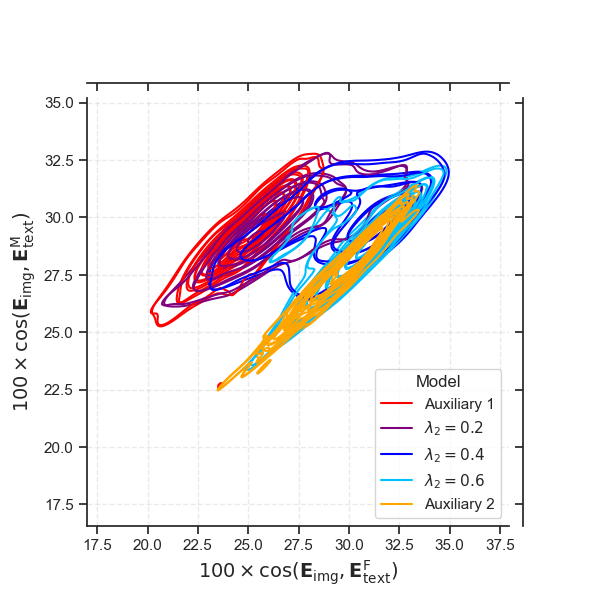

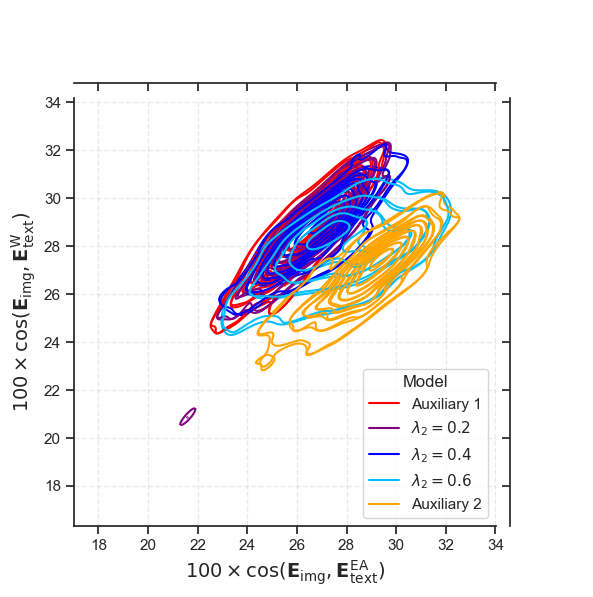

In [59]:
#@title KDE joint plots
types = ['0', '20', '40', '60', '100']
type_labels = {'0': 'Auxiliary 1', '20': r'$\lambda_2=0.2$', '40': r'$\lambda_2=0.4$', '60': r'$\lambda_2=0.6$', '80': r'$\lambda_2=0.8$', '100': 'Auxiliary 2'}

# selected_models = {'Biased Model 1', 'Biased Model 2', 'l=0.2', 'l=0.4', 'l=0.6'}
selected_models = {'Auxiliary 1', 'Auxiliary 2', 'KL barycenter', 'Ckpt merging', r'$\lambda_2=0.2$', r'$\lambda_2=0.4$', r'$\lambda_2=0.6$', r'$\lambda_2=0.8$'}
custom_palette = {"Auxiliary 2": "orange", "Auxiliary 1": "red", "KL barycenter": "blue", "Ckpt merging": "green",
    r"$\lambda_2=0.2$": "purple", r"$\lambda_2=0.4$": "blue", r"$\lambda_2=0.6$": "deepskyblue", r"$\lambda_2=0.8$": "gray"}
def convert_data(Z: list):
    Z_array = np.array(Z)
    Z_x = Z_array[:, 0]
    Z_y = Z_array[:, 1]
    return Z_x, Z_y

data = []
# gender
for typ, coords in gender_clips.items(): # [gender_clips, ethnic_clips]
    for x,y in coords:
        data.append({'Model': type_labels[typ], 'x': x, 'y': y})
df = pd.DataFrame(data)
df = df[df['Model'].isin(selected_models)]
sns.set_theme(style="ticks")
desired_order = None # TBD
g1 = sns.jointplot(data=df, x="x", y="y", hue="Model", kind="kde", 
                  palette=custom_palette, marginal_kws=dict(visible=False), 
                  hue_order=desired_order)
g1.set_axis_labels(r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{F}})$', 
                  r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{M}})$', fontsize = fontsize)
g1.plot_joint(sns.kdeplot, bw_adjust=0.8)
sns.move_legend(g1.ax_joint, "lower right")
g1.ax_joint.grid(True, linestyle='--', alpha=0.4)
# g1_fig = g1.fig
g1.savefig('gender_kde_ablate_2.pdf')

# ethnic
data = []
for typ, coords in ethnic_clips.items(): # [gender_clips, ethnic_clips]
    for x,y in coords:
        data.append({'Model': type_labels[typ], 'x': x, 'y': y})
df = pd.DataFrame(data)
df = df[df['Model'].isin(selected_models)]
sns.set_theme(style="ticks")
g2 = sns.jointplot(data=df, x="x", y="y", hue="Model", kind="kde", 
                  palette=custom_palette, marginal_kws=dict(visible=False), 
                  hue_order=desired_order)
g2.set_axis_labels(r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{EA}})$', 
                  r'$100 \times \cos(\mathbf{E}_{\text{img}}, \mathbf{E}_{\text{text}}^{\text{W}})$', fontsize = fontsize)
g2.plot_joint(sns.kdeplot, bw_adjust=0.8)
sns.move_legend(g2.ax_joint, "lower right")
g2.ax_joint.grid(True, linestyle='--', alpha=0.4)
# g2_fig = g2.fig
g2.savefig('ethnic_kde_ablate_2.pdf')